# Multiple Linear Regression

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

We use the same libraries as for simple linear regression.

In [3]:
import seaborn as sns
# Set color map to have light blue background
sns.set()

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
ads = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', usecols=[1,2,3,4])

ads.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

A multi-linear model assumes there's a linear relationship betwen a set of *independent* variable (TV ads) and a *dependent* variable (sales). The model is written:

$$ Y \sim \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$$

where, in this case, Y is sales (the dependent variable) and \( X_i \) is TV, radio and newspaper ad expenditures (the independent variables). For this model, the variables are:

$$ Sales \sim \beta_0 + \beta_1 TV + \beta_2 \textrm{radio} + \beta_3 \textrm{newspaper} $$

This model assumes that when we change the independent variable, the dependent variable follows suite.

In [6]:
model_trn = smf.ols(formula='sales~TV+radio+newspaper', data=ads).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.58e-96
Time:                        23:29:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

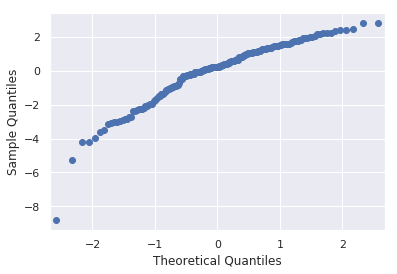

In [7]:
sm.qqplot(model_trn.resid);

In [8]:
plt.plot(ads.sales, model_trn.resid, 'bo');
plt.xlabel('sales')
plt.ylabel('residuals');

In [9]:
sm.graphics.plot_fit(model_trn, 3);

The F-test shows that the combination of TV, radio and newspaper have an effect in the model -- i.e. that the combination of them are not equal to zero.

In [10]:
model_trn.f_test('TV = radio = newspaper = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[570.27070366]]), p=1.5752272560908955e-96, df_denom=196, df_num=3>

We can also test a subset of the predictors. For a single predictor, the results should match the p-value above.

In [11]:
model_trn.f_test('newspaper = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.03122805]]), p=0.8599150500806343, df_denom=196, df_num=1>

The model seems to indicate that newspaper advertising doesn't contribute to the over all sales in conjunction with the other media (TV, radio). Earlier, we saw that TV sales directly contributed to sales. What happens if we break out newspaper sales? Does that contribute to sales?

In [12]:
model_n = smf.ols(formula='sales~newspaper', data=ads).fit()
model_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 12 Sep 2019   Prob (F-statistic):            0.00115
Time:                        23:29:35   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sm.graphics.plot_fit(model_n, 1);

Now the interaction of newspapers is significant. Why?

Recall that the data we have has all the factors in the individual sales numbers -- i.e. by changing the model, we're not going back and eliminating sales due to TV or radio, we're just computing the marginal probability of that predictor causing the outcome.

Let's look at the correlation of the predictors.

In [14]:
ads.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


Since newpapers are correlated with $r=0.35$ with Radio ("proudly consumed by oldsters and smarties the world around") perhaps we only need one to build a reasonable model. Adding in a second term just splits the contribution of the variance across the two terms. Let's see what happens when we drop newspapers.

In [15]:
model_tr = smf.ols(formula='sales~TV+radio', data=ads).fit()
model_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           4.83e-98
Time:                        23:29:48   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
beta0,beta_tv,beta_radio = model_tr.params
print('Model parameters are', beta0, beta_tv, beta_radio)

Radio = np.arange(0,50)
TV = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(beta0 + B1[i,j]*beta_radio + B2[i,j]*beta_tv)
        
from mpl_toolkits.mplot3d import axes3d

Model parameters are 2.921099912405144 0.04575481510107611 0.1879942266203089


In [18]:
#%matplotlib qt
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(ads.radio, ads.TV, ads.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');

/home/geena/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:671: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


In [50]:
model_txr = smf.ols(formula='sales~TV*radio', data=ads).fit()
model_txr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 16 Mar 2018   Prob (F-statistic):          6.68e-146
Time:                        14:21:07   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model_txr.f_test('TV:radio = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 429.59046282]]), p=2.7576809992780026e-51, df_denom=196, df_num=1>

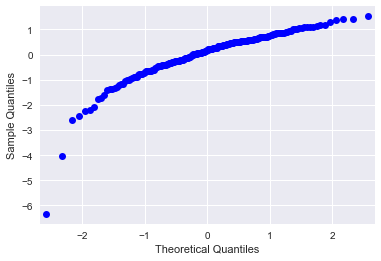

In [28]:
sm.qqplot(model_txr.resid);

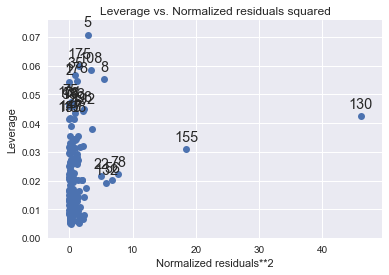

In [29]:
sm.graphics.plot_leverage_resid2(model_txr, alpha=0.05);

In [51]:
ads.iloc[[5,129,130,131,150,155]]

TV  radio  newspaper  sales
5      8.7   48.9       75.0    7.2
129   59.6   12.0       43.1    9.7
130    0.7   39.6        8.7    1.6
131  265.2    2.9       43.0   12.7
150  280.7   13.9       37.0   16.1
155    4.1   11.6        5.7    3.2

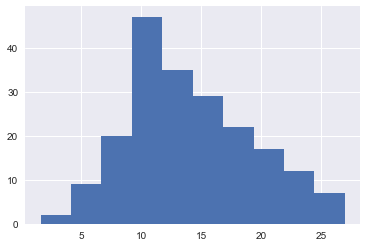

In [57]:
ads.sales.hist();